In [38]:
from keras import models
from keras import layers
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Utility function to vectorize the words in each sequence
def vectorize_sequences(sequences, dimension=10000):
    vectorized_sequences = np.zeros((len(sequences), dimension), dtype='float32')
    for i, sequence in enumerate(sequences, start=0):
        vectorized_sequences[i, sequence] = 1.
    return vectorized_sequences

In [40]:
# Loads and prepares data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/home/pradip/anaconda3/lib/python3.7/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/pradip/anaconda3/lib/python3.7/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [41]:
# Checks the maximum word index in training data
print("Maximum word index in training data: ", max([np.max(seq) for seq in train_data]))

Maximum word index in training data:  9999


#### Gets the review comment in English just for reference

In [42]:
# Gets database dictionary
word_index_dict = reuters.get_word_index()

# Reverses the order of key and value pairs to search word against its index found in training data 
index_word_dict = dict([(key, word) for (word, key) in word_index_dict.items()])

# Just checking for training data after joining words after mapping word with its index.
# Note that indices in the training data are offset by 3
' '.join([index_word_dict.get(index-3, '?') for index in train_data[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [43]:
# Encodes words into vector
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

validation_data = train_data[:1000]
train_data = train_data[1000:]

one_hot_train_labels = to_categorical(train_labels)
one_hot_validation_labels = one_hot_train_labels[:1000]
one_hot_train_labels = one_hot_train_labels[1000:]

one_hot_test_labels = to_categorical(test_labels)

In [44]:
# Creates model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Trains model with 512 batch size and 20 epochs
history = model.fit(train_data, one_hot_train_labels, batch_size=512, epochs=20, 
                    validation_data=(validation_data, one_hot_validation_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 72us/step - loss: 2.4923 - accuracy: 0.5459 - val_loss: 1.6713 - val_accuracy: 0.6740
Epoch 2/20
7982/7982 [==============================] - 0s 54us/step - loss: 1.3520 - accuracy: 0.7140 - val_loss: 1.2813 - val_accuracy: 0.7260
Epoch 3/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.0074 - accuracy: 0.7834 - val_loss: 1.1475 - val_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.7969 - accuracy: 0.8297 - val_loss: 1.0376 - val_accuracy: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.6362 - accuracy: 0.8637 - val_loss: 0.9980 - val_accuracy: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.5103 - accuracy: 0.8949 - val_loss: 0.9479 - val_accuracy: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.414

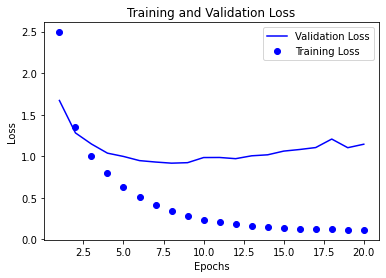

In [46]:
# Evaluates training and validation performance
history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)
validation_losses = history_dict["val_loss"]
training_losses = history_dict["loss"]

plt.plot(epochs, validation_losses, "b", label="Validation Loss")
plt.plot(epochs, training_losses, "bo", label="Training Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

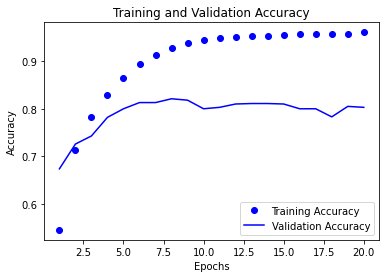

In [47]:
training_accuracies = history_dict["accuracy"]
validation_accuracies = history_dict["val_accuracy"]
plt.clf()
plt.plot(epochs, training_accuracies, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_accuracies, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, one_hot_test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

2246/2246 [==============================] - 0s 78us/step
Model Performance on Test Data: Loss is  1.2803836459043507  and accuracy is  0.780053436756134


In [49]:
# After observing overfitting beyond 9 epochs, model is retrained with 9 epoch only.

# Recreates and trains model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, one_hot_train_labels, batch_size=512, epochs=9, 
                    validation_data=(validation_data, one_hot_validation_labels))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 86us/step - loss: 2.5770 - accuracy: 0.5021 - val_loss: 1.7431 - val_accuracy: 0.6280
Epoch 2/9
7982/7982 [==============================] - 1s 63us/step - loss: 1.4277 - accuracy: 0.6986 - val_loss: 1.3396 - val_accuracy: 0.6940
Epoch 3/9
7982/7982 [==============================] - 1s 67us/step - loss: 1.0637 - accuracy: 0.7705 - val_loss: 1.1471 - val_accuracy: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.8388 - accuracy: 0.8227 - val_loss: 1.0462 - val_accuracy: 0.7750
Epoch 5/9
7982/7982 [==============================] - 0s 57us/step - loss: 0.6748 - accuracy: 0.8529 - val_loss: 0.9857 - val_accuracy: 0.7870
Epoch 6/9
7982/7982 [==============================] - 0s 57us/step - loss: 0.5376 - accuracy: 0.8869 - val_loss: 0.9390 - val_accuracy: 0.8000
Epoch 7/9
7982/7982 [==============================] - 0s 58us/step - loss: 0.4336 - acc

In [50]:
# Evaluates testing performance
evaluation = model.evaluate(test_data, one_hot_test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

2246/2246 [==============================] - 0s 72us/step
Model Performance on Test Data: Loss is  0.9831713995334832  and accuracy is  0.7902938723564148


In [51]:
# Performs predictions
predictions = model.predict(test_data)

In [52]:
# Checks if the dimension is same as that of number of topics i.e. 46
predictions[0].shape

(46,)

In [53]:
## To check predicted probability distributions for all topics for 0th newswire are summed up to 1
np.sum(predictions[0])

1.0

In [54]:
# Gets the ID of topic that has highest predicted probability
np.argmax(predictions[0])

3

## Now, consider the above model is baselined and let's experiment with different number hiddent layers, hidden units, optimizers and activation functions.

In [55]:
# Recreates and trains model with 32 hidden units
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, one_hot_train_labels, batch_size=512, epochs=9, 
                    validation_data=(validation_data, one_hot_validation_labels), verbose=0)

# Evaluates testing performance
evaluation = model.evaluate(test_data, one_hot_test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

2246/2246 [==============================] - 0s 60us/step
Model Performance on Test Data: Loss is  1.0352552968905848  and accuracy is  0.7742653489112854


In [56]:
# Recreates and trains model with 128 hidden units
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, one_hot_train_labels, batch_size=512, epochs=9, 
                    validation_data=(validation_data, one_hot_validation_labels), verbose=0)

# Evaluates testing performance
evaluation = model.evaluate(test_data, one_hot_test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

2246/2246 [==============================] - 0s 101us/step
Model Performance on Test Data: Loss is  1.1151807418595652  and accuracy is  0.7804986834526062


In [57]:
# Recreates and trains model with 1 hidden unit
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, one_hot_train_labels, batch_size=512, epochs=9, 
                    validation_data=(validation_data, one_hot_validation_labels), verbose=0)

# Evaluates testing performance
evaluation = model.evaluate(test_data, one_hot_test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

2246/2246 [==============================] - 0s 75us/step
Model Performance on Test Data: Loss is  0.9055948191631721  and accuracy is  0.792965292930603


In [58]:
# Recreates and trains model with 1 hidden unit
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, one_hot_train_labels, batch_size=512, epochs=9, 
                    validation_data=(validation_data, one_hot_validation_labels), verbose=0)

# Evaluates testing performance
evaluation = model.evaluate(test_data, one_hot_test_labels)
print("Model Performance on Test Data: Loss is ", evaluation[0], " and accuracy is ", evaluation[1])

2246/2246 [==============================] - 0s 93us/step
Model Performance on Test Data: Loss is  1.0941259525550442  and accuracy is  0.7756010890007019


## Below are the observations.

    1. Reducing hiddent units less than the number of classification categories is not a good idea as it looses the data representations.
    2. There is slight improvement in accuracy with the increase of hiddent units.
    3. Increasing hidden layers is not improving accuracy.